In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('fantasy_football_sim.csv')
df = df[df.Week>=6]
df.head(10)

,Week,Eric,Quinn,Nate,Ben,Luke,Lo
5,6,93.12,116.40,114.12,108.02,109.22,100.04
6,7,105.50,121.56,105.66,79.62,135.60,108.40
7,8,112.34,122.14,108.62,97.34,99.60,96.72
8,9,112.94,114.50,104.42,88.00,135.22,87.30
9,10,109.14,96.00,101.32,81.82,101.50,102.46
10,11,93.58,131.04,114.58,79.88,81.66,105.24
11,12,85.40,119.64,84.92,84.80,102.90,120.22
12,13,113.40,105.40,106.58,75.42,85.92,149.28
13,14,92.78,142.90,120.74,68.94,133.66,131.62


In [6]:
players = {
    'Eric': {'mean_score':df['Eric'].mean()
            ,'stdev_score':df['Eric'].std()},
    'Quinn': {'mean_score':df['Quinn'].mean()
            ,'stdev_score':df['Quinn'].std()},
    'Nate': {'mean_score':df['Nate'].mean()
            ,'stdev_score':df['Nate'].std()},
    'Ben': {'mean_score':df['Ben'].mean()
            ,'stdev_score':df['Ben'].std()},
    'Luke': {'mean_score':df['Luke'].mean()
            ,'stdev_score':df['Luke'].std()},
    'Lo': {'mean_score':df['Lo'].mean()
            ,'stdev_score':df['Lo'].std()},
}

In [7]:
players

{'Ben': {'mean_score': 84.8711111111111, 'stdev_score': 11.758282659942783},
 'Eric': {'mean_score': 102.02222222222223, 'stdev_score': 10.78252959395171},
 'Lo': {'mean_score': 111.25333333333333, 'stdev_score': 19.279434639013665},
 'Luke': {'mean_score': 109.47555555555554, 'stdev_score': 20.80612596755527},
 'Nate': {'mean_score': 106.77333333333334, 'stdev_score': 10.170530959591048},
 'Quinn': {'mean_score': 118.84222222222222, 'stdev_score': 13.57267639209174}}

In [8]:
def matchup(player1, player2):
    """
    Given two names, assign a score to each player from a normal distribution 
    created from his historic mean and sd of points scored. Return the name of 
    the winner (player who scored higher).
    """
    p1_score = np.random.normal(players[player1]['mean_score'], players[player1]['stdev_score'])
    p2_score = np.random.normal(players[player2]['mean_score'], players[player2]['stdev_score'])
    
    if p1_score >= p2_score: 
        return player1
    else:
        return player2

# Abington Heights League

In [9]:
def simulate():
    
    # Quarterfinals
    #quarterfinal1 = matchup('Ben', 'Lo')
    #quarterfinal2 = matchup('Quinn', 'Luke')

    # Semifinals 
    semifinal1 = matchup('Nate', 'Lo')
    semifinal2 = matchup('Eric', 'Quinn')
    
    # Finals
    final = matchup(semifinal1, semifinal2)
    
    # Return Champion
    return final 

In [10]:
wins = []

for i in range(200000):
    wins.append(simulate())

In [11]:
percents = pd.Series(wins).value_counts(normalize=True, 
                                        sort=True, 
                                        ascending=False, 
                                        bins=None, 
                                        dropna=True
                                       )

percent_df = pd.DataFrame(percents).reset_index()
percent_df.columns = ['Team', 'Win Probability']
percent_df.head(6)

,Team,Win Probability
0,Quinn,0.566880
1,Lo,0.246575
2,Nate,0.126790
3,Eric,0.059755


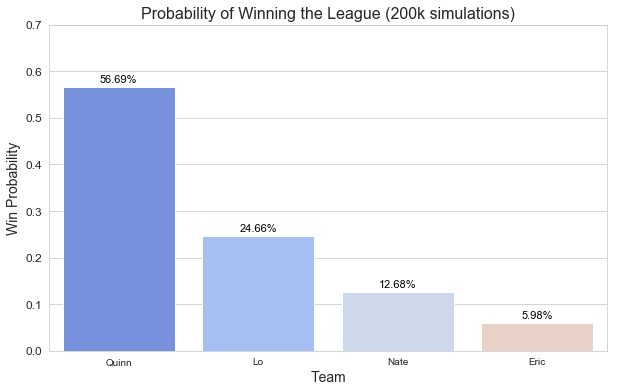

In [14]:
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("coolwarm"))

plt.figure(figsize=(10, 6))
sns.barplot(percent_df.Team, percent_df['Win Probability'])

for i, row in percent_df.iterrows():
    plt.text(  i
             , row[1]+.01
             , s="{:.2%}".format(round(row[1], 5))
             , color='black'
             , ha="center"
             , fontsize=11
            )
    
plt.yticks(fontsize=12)
plt.title('Probability of Winning the League (200k simulations)', fontsize=16)
plt.ylabel('Win Probability', fontsize=14)
plt.xlabel('Team', fontsize=14)
plt.ylim(0, .7)

plt.savefig('results.png')

plt.show()

# Lo's League

In [246]:
df = pd.read_csv('lo_fantasy.csv')
df = df[df.Week>=7]
df.head()

,Week,Lo,Dylan,Krieger,North,Jake,Peter
7,8,155.96,162.59,115.21,140.62,92.22,121.54
8,9,153.05,109.69,95.84,114.90,78.94,119.24
9,10,93.88,101.60,116.46,90.85,131.45,124.86
10,11,116.82,140.21,174.80,130.10,156.53,96.32
11,12,145.67,170.23,87.95,76.77,125.05,119.63


In [247]:
players = {
    'Lo': {'mean_score':df['Lo'].mean()
            ,'stdev_score':df['Lo'].std()},
    'Dylan': {'mean_score':df['Dylan'].mean()
            ,'stdev_score':df['Dylan'].std()},
    'Krieger': {'mean_score':df['Krieger'].mean()
            ,'stdev_score':df['Krieger'].std()},
    'North': {'mean_score':df['North'].mean()
            ,'stdev_score':df['North'].std()},
    'Jake': {'mean_score':df['Jake'].mean()
            ,'stdev_score':df['Jake'].std()},
    'Peter': {'mean_score':df['Peter'].mean()
            ,'stdev_score':df['Peter'].std()},
}

In [248]:
def simulate():
    
    quarterfinal1 = matchup('Lo', 'Peter')
    quarterfinal2 = matchup('Krieger', 'North')

    
    semifinal1 = matchup('Dylan', quarterfinal1)
    semifinal2 = matchup('Jake', quarterfinal2)
    

    final = matchup(semifinal1, semifinal2)
    
    return final 
    

In [249]:
wins = []

for i in range(100000):
    wins.append(simulate())

In [244]:
percents = pd.Series(wins).value_counts(normalize=True, 
                                        sort=True, 
                                        ascending=False, 
                                        bins=None, 
                                        dropna=True
                                       )

percents

Dylan      0.40954
Lo         0.21794
Jake       0.17927
Krieger    0.10224
North      0.05271
Peter      0.03830
dtype: float64

In [250]:
percent_df = pd.DataFrame(percents, columns=['Win Probability']).reset_index()
percent_df.head()

,index,Win Probability
0,Dylan,0.40954
1,Lo,0.21794
2,Jake,0.17927
3,Krieger,0.10224
4,North,0.05271


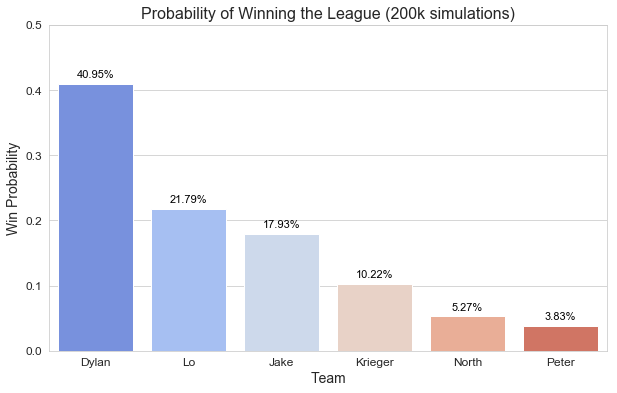

In [251]:
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("coolwarm"))

plt.figure(figsize=(10, 6))
sns.barplot(percent_df.index, percent_df['Win Probability'])

for i, row in percent_df.iterrows():
    plt.text(  i
             , row[1]+.01
             , s="{:.2%}".format(round(row[1], 5))
             , color='black'
             , ha="center"
             , fontsize=11
            )
    
plt.xticks(range(6), percent_df['index'], fontsize=12)
plt.yticks(fontsize=12)
plt.title('Probability of Winning the League (200k simulations)', fontsize=16)
plt.ylabel('Win Probability', fontsize=14)
plt.xlabel('Team', fontsize=14)
plt.ylim(0, .5)
plt.show()

# DKE League

In [23]:
df = pd.read_csv('fantasy_football_sim_dke.csv')
df = df[df.Week>=6]
df.head()

,Week,Eric,Caltz,Slum,Na,Zack,Kinnaird
5,6,68.48,108.56,97.90,133.18,113.18,100.10
6,7,102.22,120.34,174.12,87.68,50.42,109.10
7,8,110.58,130.12,119.52,100.86,111.34,105.74
8,9,120.14,100.50,98.54,135.50,116.26,123.98
9,10,100.34,122.16,102.98,111.46,78.82,109.16


In [24]:
players = {
    'Eric': {'mean_score':df['Eric'].mean()
            ,'stdev_score':df['Eric'].std()},
    'Caltz': {'mean_score':df['Caltz'].mean()
            ,'stdev_score':df['Caltz'].std()},
    'Slum': {'mean_score':df['Slum'].mean()
            ,'stdev_score':df['Slum'].std()},
    'Na': {'mean_score':df['Na'].mean()
            ,'stdev_score':df['Na'].std()},
    'Zack': {'mean_score':df['Zack'].mean()
            ,'stdev_score':df['Zack'].std()},
    'Kinnaird': {'mean_score':df['Kinnaird'].mean()
            ,'stdev_score':df['Kinnaird'].std()},
}

#players['Slum']['mean_score'] = players['Slum']['mean_score']-10

In [25]:
def simulate():
    
    #quarterfinal1 = matchup('Kinnaird', 'Caltz')
    #quarterfinal2 = matchup('Zack', 'Eric')

    
    semifinal1 = matchup('Na', 'Caltz')
    semifinal2 = matchup('Slum', 'Eric')
    

    final = matchup(semifinal1, semifinal2)
    
    return final 
    

In [26]:
wins = []

for i in range(100000):
    wins.append(simulate())

In [27]:
percents = pd.Series(wins).value_counts(normalize=True, 
                                        sort=True, 
                                        ascending=False, 
                                        bins=None, 
                                        dropna=True
                                       )

percents

Slum     0.43701
Caltz    0.24507
Na       0.19338
Eric     0.12454
dtype: float64

In [28]:
percent_df = pd.DataFrame(percents, columns=['Win Probability']).reset_index()
percent_df.head()

,index,Win Probability
0,Slum,0.43701
1,Caltz,0.24507
2,Na,0.19338
3,Eric,0.12454


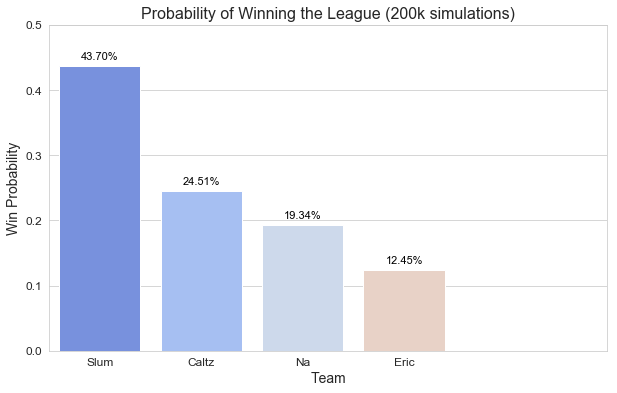

In [30]:
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("coolwarm"))

plt.figure(figsize=(10, 6))
sns.barplot(percent_df.index, percent_df['Win Probability'])

for i, row in percent_df.iterrows():
    plt.text(  i
             , row[1]+.01
             , s="{:.2%}".format(round(row[1], 5))
             , color='black'
             , ha="center"
             , fontsize=11
            )
    
plt.xticks(range(6), percent_df['index'], fontsize=12)
plt.yticks(fontsize=12)
plt.title('Probability of Winning the League (200k simulations)', fontsize=16)
plt.ylabel('Win Probability', fontsize=14)
plt.xlabel('Team', fontsize=14)
plt.ylim(0, .5)

plt.savefig('dke_results.png')

plt.show()